## U tube video link for this file

https://youtu.be/9yrw7Dp2HIw

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('forestfires.csv')

In [3]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## task is to check all the mean temp in every month and day at single glance

In [4]:
df.shape

(517, 13)

In [5]:
df.groupby('month').count().sum()

X       517
Y       517
day     517
FFMC    517
DMC     517
DC      517
ISI     517
temp    517
RH      517
wind    517
rain    517
area    517
dtype: int64

In [6]:
df_group=df.groupby('month').sum()

In [7]:
df_group.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
month,,,,,,,,,,,
apr,52,38,772.1,143.2,437.0,48.4,108.4,422,42.0,0.0,80.02
aug,825,788,16990.0,28286.8,117958.3,2037.3,3980.2,8370,751.9,10.8,2297.99
dec,41,45,764.7,235.1,3161.2,31.2,40.7,346,68.8,0.0,119.97
feb,103,88,1658.1,189.5,1093.4,67.0,192.7,1114,75.1,0.0,125.50
jan,6,9,100.8,4.8,180.7,2.9,10.5,178,4.0,0.0,0.00


In [8]:
df_group.shape

(12, 11)

In [9]:
df_group1=df.groupby(['month','day']).sum()

In [10]:
df_group1.shape

(64, 11)

In [11]:
df.month.nunique()*df.day.nunique()  # never should exceed by this value

84

In [12]:
df_group1=df.groupby(['month','day']).mean()

# Pivot

In [13]:
df_group1.head(2)

X    Y  FFMC   DMC    DC  ISI  temp    RH  wind  rain  area
month day                                                               
apr   fri  4.0  4.0  83.0  23.3  85.3  2.3  16.7  20.0   3.1   0.0  0.00
      mon  6.0  5.0  87.9  24.9  41.6  3.7  10.9  64.0   3.1   0.0  3.35

In [14]:
df_group1.reset_index(inplace=True)

In [15]:
df_pivot=df_group1.pivot(index='month',columns='day',values='temp')

In [16]:
df_pivot.shape

(12, 7)

In [17]:
df_pivot

day,fri,mon,sat,sun,thu,tue,wed
month,,,,,,,
apr,16.700000,10.900000,9.300000,14.900000,5.800000,NaN,15.200000
aug,21.238095,22.693333,20.503448,21.257500,21.407692,21.842857,23.228000
dec,2.200000,4.600000,NaN,4.800000,5.100000,5.100000,5.100000
feb,11.680000,8.900000,11.725000,8.875000,6.700000,4.850000,8.800000
jan,NaN,NaN,5.300000,5.200000,NaN,NaN,NaN
jul,17.033333,21.575000,22.450000,24.360000,29.200000,22.500000,15.366667
jun,20.533333,18.033333,17.550000,18.225000,24.550000,NaN,25.200000
mar,14.000000,11.783333,15.430000,10.628571,11.420000,15.100000,12.450000
may,18.000000,NaN,11.300000,NaN,NaN,NaN,NaN


## pivot table

In [18]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [22]:
df_pivot_table=df.pivot_table(values='temp',
    index='month',
    columns='day',
    aggfunc='mean',
    
    )

In [23]:
df.pivot_table(values='temp',
    index='day',
    columns='month',
    aggfunc='mean',
    fill_value='not known'
    )

month,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
day,,,,,,,,,,,,
fri,16.7,21.238095,2.2,11.680,not known,17.033333,20.533333,14.000000,18.0,not known,11.3,18.586842
mon,10.9,22.693333,4.6,8.900,not known,21.575000,18.033333,11.783333,not known,not known,17.175,18.125000
sat,9.3,20.503448,not known,11.725,5.3,22.450000,17.55,15.430000,11.3,not known,16.933333,21.524000
sun,14.9,21.257500,4.8,8.875,5.2,24.360000,18.225,10.628571,not known,not known,16.6,20.437037
thu,5.8,21.407692,5.1,6.700,not known,29.200000,24.55,11.420000,not known,not known,not known,20.390476
tue,not known,21.842857,5.1,4.850,not known,22.500000,not known,15.100000,not known,11.8,19.85,18.721053
wed,15.2,23.228000,5.1,8.800,not known,15.366667,25.2,12.450000,not known,not known,18.05,20.407143


<AxesSubplot:xlabel='day', ylabel='month'>

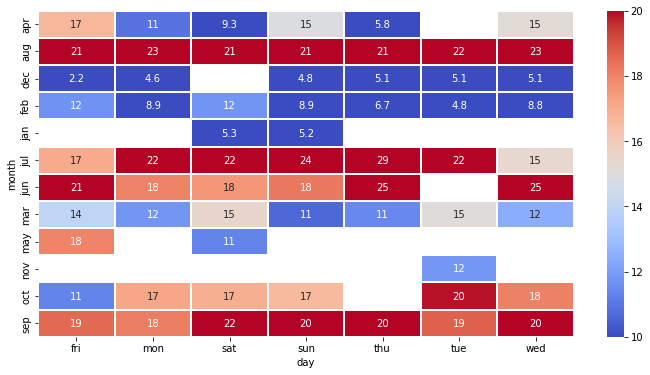

In [28]:
fig=plt.figure(figsize=(12,6))
sns.heatmap(df_pivot_table,annot=True,cmap='coolwarm',linecolor='white',linewidths=2,vmin=10,vmax=20)

In [29]:
df_pivot_table

day,fri,mon,sat,sun,thu,tue,wed
month,,,,,,,
apr,16.700000,10.900000,9.300000,14.900000,5.800000,NaN,15.200000
aug,21.238095,22.693333,20.503448,21.257500,21.407692,21.842857,23.228000
dec,2.200000,4.600000,NaN,4.800000,5.100000,5.100000,5.100000
feb,11.680000,8.900000,11.725000,8.875000,6.700000,4.850000,8.800000
jan,NaN,NaN,5.300000,5.200000,NaN,NaN,NaN
jul,17.033333,21.575000,22.450000,24.360000,29.200000,22.500000,15.366667
jun,20.533333,18.033333,17.550000,18.225000,24.550000,NaN,25.200000
mar,14.000000,11.783333,15.430000,10.628571,11.420000,15.100000,12.450000
may,18.000000,NaN,11.300000,NaN,NaN,NaN,NaN


In [39]:
df.pivot_table(
    values='temp',
    index='month',
    columns='day',
    aggfunc='sum',
    fill_value='na',
    margins=True,
    dropna=True,
    margins_name='Total',
    observed=False,
    sort=True,
    )

day,fri,mon,sat,sun,thu,tue,wed,Total
month,,,,,,,,
apr,16.7,10.9,9.3,44.7,11.6,na,15.2,108.4
aug,446.0,340.4,594.6,850.3,556.6,611.6,580.7,3980.2
dec,2.2,18.4,na,4.8,5.1,5.1,5.1,40.7
feb,58.4,26.7,46.9,35.5,6.7,9.7,8.8,192.7
jan,na,na,5.3,5.2,na,na,na,10.5
jul,51.1,86.3,179.6,121.8,87.6,135.0,46.1,707.5
jun,61.6,54.1,35.1,72.9,49.1,na,75.6,348.4
mar,154.0,141.4,154.3,74.4,57.1,75.5,49.8,706.5
may,18.0,na,11.3,na,na,na,na,29.3
